In [1]:
from Bio import SeqIO

In [2]:
# load dna sequence into a list
nucleotide = SeqIO.parse('sequences.fasta','fasta')
nucleotide_data = []
for sequence in nucleotide:
    nucleotide_data.append(str(sequence.seq))

In [3]:
# find max length of the sequence
max_len = 0
for data in nucleotide_data:
    if len(data) > max_len:
        max_len = len(data)
print(max_len)

29903


In [4]:
# extend the string to same length (max_len)
for i in range(0, len(nucleotide_data)):
    nucleotide_data[i] = nucleotide_data[i].ljust(max_len, 'N')

In [5]:
# split string to string
for i in range(0, len(nucleotide_data)):
    nucleotide_data[i] = [char for char in nucleotide_data[i]]

In [14]:
#import for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Input
from keras import optimizers
from keras import backend as K

In [7]:
#encoding data with numbers

nucleic_acid_encoding = {
    'A': 0,
    'G': 1,
    'C': 2,
    'T': 3,
    'Y': 4,
    'M': 5,
    'S': 6,
    'K': 7,
    'R': 8,
    'W': 9,
    'N': 10
}

encoded_nucleotide = []
for i in range(0, len(nucleotide_data)):
    encoded_nucleotide.append([])
    for j in range(0, max_len):
        encoded_nucleotide[i].append(nucleic_acid_encoding[nucleotide_data[i][j]])

encoded_nucleotide = np.array(encoded_nucleotide)

In [21]:
# building autoencoder


encoding_dim1 = 128
encoding_dim2 = 16
encoding_dim3 = 3
decoding_dim3 = 16
decoding_dim2 = 128



input_data = Input(shape=encoded_nucleotide.shape[1])
encoded1 = Dense(encoding_dim1, activation='relu')(input_data)
encoded2 = Dense(encoding_dim2, activation='relu')(encoded1)
encoded3 = Dense(encoding_dim3, activation='relu', name='encode_layer')(encoded2)
decoded3 = Dense(decoding_dim3, activation='relu')(encoded3)
decoded2 = Dense(decoding_dim2, activation='relu')(decoded3)
decoded1 = Dense(encoded_nucleotide.shape[1], activation='relu')(decoded2)

autoencoder = Model(input_data, decoded1)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

hist_auto = autoencoder.fit(encoded_nucleotide, encoded_nucleotide, epochs=500,
                           batch_size=32, shuffle=True,
                           validation_split=0.2)

Epoch 1/500
24/24 [==============================] - 2s 49ms/step - loss: 0.5880 - val_loss: 0.3195
Epoch 2/500
24/24 [==============================] - 1s 40ms/step - loss: 0.3607 - val_loss: 0.2668
Epoch 3/500
24/24 [==============================] - 1s 41ms/step - loss: 0.3187 - val_loss: 0.2304
Epoch 4/500
24/24 [==============================] - 1s 41ms/step - loss: 0.2789 - val_loss: 0.2141
Epoch 5/500
24/24 [==============================] - 1s 40ms/step - loss: 0.2687 - val_loss: 0.2000
Epoch 6/500
24/24 [==============================] - 1s 41ms/step - loss: 0.2527 - val_loss: 0.1951
Epoch 7/500
24/24 [==============================] - 1s 42ms/step - loss: 0.2416 - val_loss: 0.1926
Epoch 8/500
24/24 [==============================] - 1s 40ms/step - loss: 0.2451 - val_loss: 0.1910
Epoch 9/500
24/24 [==============================] - 1s 40ms/step - loss: 0.2504 - val_loss: 0.1886
Epoch 10/500
24/24 [==============================] - 1s 41ms/step - loss: 0.2462 - val_loss: 0.1856

24/24 [==============================] - 1s 42ms/step - loss: 0.0827 - val_loss: 0.0600
Epoch 83/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0834 - val_loss: 0.0579
Epoch 84/500
24/24 [==============================] - 1s 41ms/step - loss: 0.0811 - val_loss: 0.0568
Epoch 85/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0829 - val_loss: 0.0575
Epoch 86/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0769 - val_loss: 0.0545
Epoch 87/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0764 - val_loss: 0.0559
Epoch 88/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0753 - val_loss: 0.0533
Epoch 89/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0722 - val_loss: 0.0526
Epoch 90/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0722 - val_loss: 0.0527
Epoch 91/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0728 - val_loss: 0.0522
Epo

24/24 [==============================] - 1s 40ms/step - loss: 0.0460 - val_loss: 0.0378
Epoch 163/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0482 - val_loss: 0.0370
Epoch 164/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0468 - val_loss: 0.0370
Epoch 165/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0470 - val_loss: 0.0372
Epoch 166/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0461 - val_loss: 0.0370
Epoch 167/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0452 - val_loss: 0.0371
Epoch 168/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0444 - val_loss: 0.0372
Epoch 169/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0479 - val_loss: 0.0381
Epoch 170/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0474 - val_loss: 0.0373
Epoch 171/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0492 - val_loss: 0

24/24 [==============================] - 1s 40ms/step - loss: 0.0703 - val_loss: 0.0361
Epoch 243/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0527 - val_loss: 0.0338
Epoch 244/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0491 - val_loss: 0.0331
Epoch 245/500
24/24 [==============================] - 1s 41ms/step - loss: 0.0412 - val_loss: 0.0315
Epoch 246/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0398 - val_loss: 0.0297
Epoch 247/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0366 - val_loss: 0.0285
Epoch 248/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0347 - val_loss: 0.0275
Epoch 249/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0333 - val_loss: 0.0273
Epoch 250/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0319 - val_loss: 0.0268
Epoch 251/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0319 - val_loss: 0

24/24 [==============================] - 1s 40ms/step - loss: 0.0242 - val_loss: 0.0204
Epoch 323/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0253 - val_loss: 0.0206
Epoch 324/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0254 - val_loss: 0.0204
Epoch 325/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0246 - val_loss: 0.0204
Epoch 326/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0248 - val_loss: 0.0206
Epoch 327/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0239 - val_loss: 0.0209
Epoch 328/500
24/24 [==============================] - 1s 41ms/step - loss: 0.0252 - val_loss: 0.0206
Epoch 329/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0237 - val_loss: 0.0205
Epoch 330/500
24/24 [==============================] - 1s 41ms/step - loss: 0.0254 - val_loss: 0.0205
Epoch 331/500
24/24 [==============================] - 1s 42ms/step - loss: 0.0260 - val_loss: 0

24/24 [==============================] - 1s 39ms/step - loss: 0.0212 - val_loss: 0.0182
Epoch 403/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0199 - val_loss: 0.0196
Epoch 404/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0219 - val_loss: 0.0189
Epoch 405/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0217 - val_loss: 0.0188
Epoch 406/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0238 - val_loss: 0.0185
Epoch 407/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0202 - val_loss: 0.0188
Epoch 408/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0205 - val_loss: 0.0182
Epoch 409/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0212 - val_loss: 0.0184
Epoch 410/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0213 - val_loss: 0.0187
Epoch 411/500
24/24 [==============================] - 1s 39ms/step - loss: 0.0227 - val_loss: 0

24/24 [==============================] - 1s 40ms/step - loss: 0.0190 - val_loss: 0.0174
Epoch 483/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0194 - val_loss: 0.0176
Epoch 484/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0203 - val_loss: 0.0176
Epoch 485/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0195 - val_loss: 0.0185
Epoch 486/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0202 - val_loss: 0.0194
Epoch 487/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0234 - val_loss: 0.0210
Epoch 488/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0274 - val_loss: 0.0277
Epoch 489/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0463 - val_loss: 0.0325
Epoch 490/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0352 - val_loss: 0.0254
Epoch 491/500
24/24 [==============================] - 1s 40ms/step - loss: 0.0381 - val_loss: 0

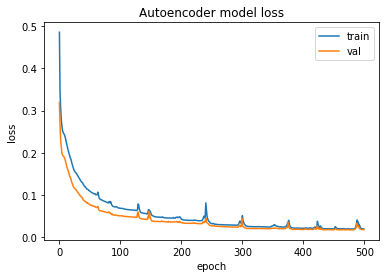

In [22]:
# plot training history

plt.figure()
plt.plot(hist_auto.history['loss'])
plt.plot(hist_auto.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [23]:
autoencoder.summary() # autoencoder architecture

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 29903)]           0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               3827712   
_________________________________________________________________
dense_61 (Dense)             (None, 16)                2064      
_________________________________________________________________
encode_layer (Dense)         (None, 3)                 51        
_________________________________________________________________
dense_62 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_63 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_64 (Dense)             (None, 29903)             385

In [24]:
# build another model that outputs 3 dimensional data

encoded_layer = Model(inputs=autoencoder.input,
               outputs=autoencoder.get_layer('encode_layer').output)

In [25]:
# crearte new dataset with 3 dimensional data

encoded_data = []
for sequence in encoded_nucleotide:
    encoded_data.append(encoded_layer.predict(np.array([sequence,]))[0])


In [26]:
# import for clustering

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

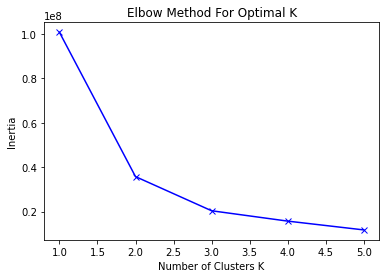

In [27]:
# determine the optimal number of clusters using elbow method

inertia = []
K = range(1,6)
for k in K:
    km = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(encoded_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [28]:
# create a dataset for visualizing clusters

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(encoded_data)
P = kmeans.predict(encoded_data)

In [31]:
# plot 3D graph of clusters

%matplotlib
encoded_fig = plt.figure()
ax = Axes3D(encoded_fig)
p = ax.scatter([row[0] for row in encoded_data], 
               [row[1] for row in encoded_data], 
               [row[2] for row in encoded_data], 
               c=P, marker="o", picker=True, cmap="rainbow")
plt.colorbar(p, shrink=0.5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

Using matplotlib backend: Qt5Agg
